В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.
Побудуйте мережі - RNN, LSTM, двостороння та глибока.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

In [2]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
# Побудова RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [4]:
# Побудова LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

In [5]:
# Побудова Bidirectional
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

In [6]:
# Побудова Deep RNN
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

In [7]:
models = [model_rnn, model_lstm, model_bidirectional, model_deep_rnn]
for model in models:
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [8]:
history_model_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


157/157 [==============================] - 19s 106ms/step - loss: 0.5971 - acc: 0.6676 - val_loss: 0.4534 - val_acc: 0.7950
Epoch 2/10
157/157 [==============================] - 15s 96ms/step - loss: 0.3995 - acc: 0.8298 - val_loss: 0.3807 - val_acc: 0.8374
Epoch 3/10
157/157 [==============================] - 15s 98ms/step - loss: 0.3284 - acc: 0.8661 - val_loss: 0.3798 - val_acc: 0.8418
Epoch 4/10
157/157 [==============================] - 17s 107ms/step - loss: 0.2735 - acc: 0.8921 - val_loss: 0.4047 - val_acc: 0.8498
Epoch 5/10
157/157 [==============================] - 17s 107ms/step - loss: 0.2315 - acc: 0.9099 - val_loss: 0.3624 - val_acc: 0.8602
Epoch 6/10
157/157 [==============================] - 17s 109ms/step - loss: 0.1952 - acc: 0.9294 - val_loss: 0.4778 - val_acc: 0.7776
Epoch 7/10
157/157 [==============================] - 18s 112ms/step - loss: 0.1824 - acc: 0.9347 - val_loss: 0.3886 - val_acc: 0.8488
Epoch 8/10
157/157 [==============================] - 1

In [9]:
history_model_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 43s 260ms/step - loss: 0.6057 - acc: 0.6646 - val_loss: 0.4705 - val_acc: 0.7932
Epoch 2/10
157/157 [==============================] - 39s 252ms/step - loss: 0.3603 - acc: 0.8529 - val_loss: 0.4065 - val_acc: 0.8246
Epoch 3/10
157/157 [==============================] - 40s 254ms/step - loss: 0.2767 - acc: 0.8940 - val_loss: 0.3162 - val_acc: 0.8652
Epoch 4/10
157/157 [==============================] - 40s 258ms/step - loss: 0.2309 - acc: 0.9135 - val_loss: 0.5174 - val_acc: 0.8230
Epoch 5/10
157/157 [==============================] - 37s 238ms/step - loss: 0.2025 - acc: 0.9271 - val_loss: 0.2968 - val_acc: 0.8746
Epoch 6/10
157/157 [==============================] - 35s 222ms/step - loss: 0.1768 - acc: 0.9383 - val_loss: 0.3013 - val_acc: 0.8728
Epoch 7/10
157/157 [==============================] - 37s 233ms/step - loss: 0.1627 - acc: 0.9428 - val_loss: 0.3601 - val_acc: 0.8744
Epoch 8/10
157/157 [==============================] - 4

In [10]:
history_model_bidirectional = model_bidirectional.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 88s 537ms/step - loss: 0.6354 - acc: 0.6313 - val_loss: 0.4755 - val_acc: 0.7920
Epoch 2/10
157/157 [==============================] - 78s 499ms/step - loss: 0.3949 - acc: 0.8338 - val_loss: 0.3505 - val_acc: 0.8558
Epoch 3/10
157/157 [==============================] - 80s 510ms/step - loss: 0.3059 - acc: 0.8775 - val_loss: 0.3710 - val_acc: 0.8444
Epoch 4/10
157/157 [==============================] - 82s 519ms/step - loss: 0.2556 - acc: 0.9028 - val_loss: 0.3114 - val_acc: 0.8704
Epoch 5/10
157/157 [==============================] - 74s 470ms/step - loss: 0.2193 - acc: 0.9201 - val_loss: 0.3741 - val_acc: 0.8522
Epoch 6/10
157/157 [==============================] - 76s 483ms/step - loss: 0.1940 - acc: 0.9295 - val_loss: 0.3611 - val_acc: 0.8766
Epoch 7/10
157/157 [==============================] - 75s 481ms/step - loss: 0.1727 - acc: 0.9381 - val_loss: 0.4084 - val_acc: 0.8762
Epoch 8/10
157/157 [==============================] - 7

In [11]:
history_model_deep_rnn = model_deep_rnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 35s 213ms/step - loss: 0.6170 - acc: 0.6339 - val_loss: 0.4662 - val_acc: 0.7968
Epoch 2/10
157/157 [==============================] - 32s 202ms/step - loss: 0.3841 - acc: 0.8366 - val_loss: 0.3537 - val_acc: 0.8552
Epoch 3/10
157/157 [==============================] - 32s 202ms/step - loss: 0.2842 - acc: 0.8842 - val_loss: 0.4357 - val_acc: 0.7940
Epoch 4/10
157/157 [==============================] - 32s 206ms/step - loss: 0.2013 - acc: 0.9250 - val_loss: 0.3972 - val_acc: 0.8642
Epoch 5/10
157/157 [==============================] - 32s 205ms/step - loss: 0.1286 - acc: 0.9546 - val_loss: 0.5275 - val_acc: 0.8294
Epoch 6/10
157/157 [==============================] - 32s 207ms/step - loss: 0.0741 - acc: 0.9760 - val_loss: 0.5371 - val_acc: 0.8278
Epoch 7/10
157/157 [==============================] - 31s 200ms/step - loss: 0.0400 - acc: 0.9871 - val_loss: 0.6702 - val_acc: 0.8184
Epoch 8/10
157/157 [==============================] - 3

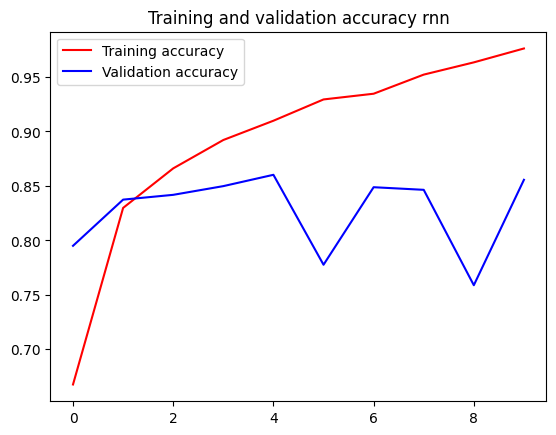

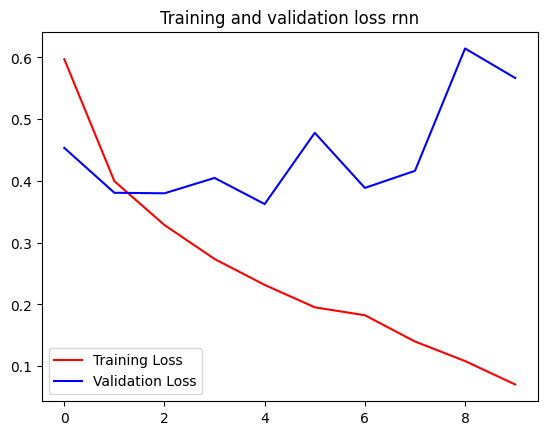

In [14]:
import matplotlib.pyplot as plt

acc = history_model_rnn.history['acc']
val_acc = history_model_rnn.history['val_acc']
loss = history_model_rnn.history['loss']
val_loss = history_model_rnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy rnn')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss rnn')
plt.legend()

plt.show()

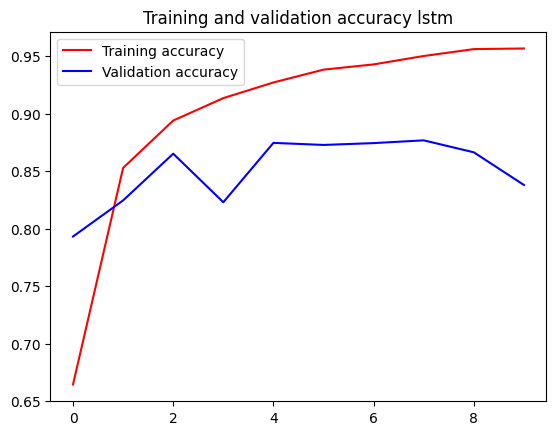

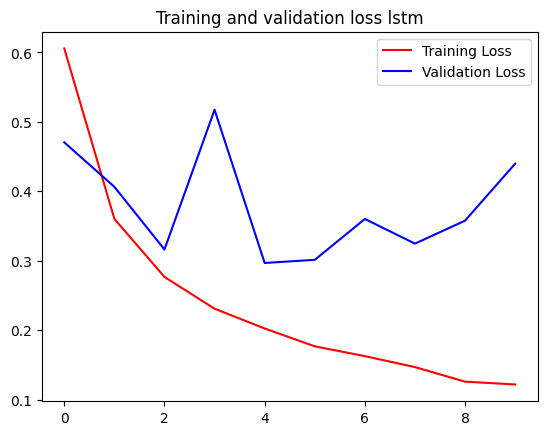

In [15]:
acc = history_model_lstm.history['acc']
val_acc = history_model_lstm.history['val_acc']
loss = history_model_lstm.history['loss']
val_loss = history_model_lstm.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy lstm')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss lstm')
plt.legend()

plt.show()

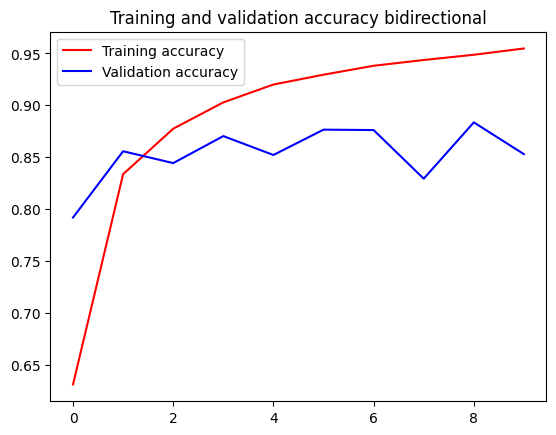

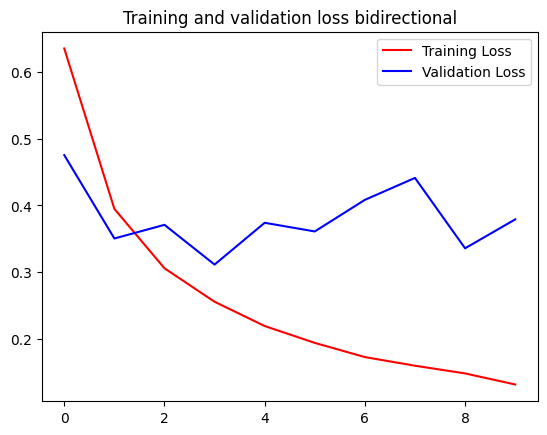

In [16]:
import matplotlib.pyplot as plt

acc = history_model_bidirectional.history['acc']
val_acc = history_model_bidirectional.history['val_acc']
loss = history_model_bidirectional.history['loss']
val_loss = history_model_bidirectional.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy bidirectional')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss bidirectional')
plt.legend()

plt.show()

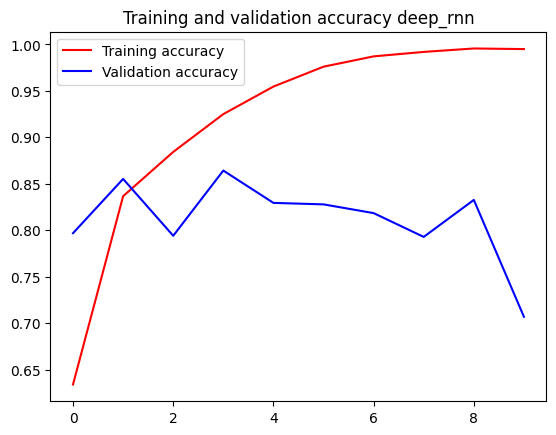

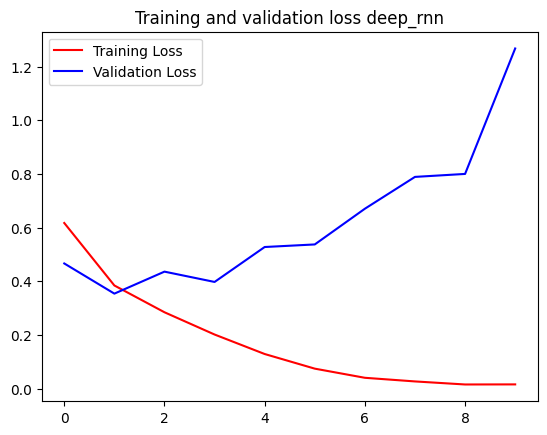

In [17]:
import matplotlib.pyplot as plt

acc = history_model_deep_rnn.history['acc']
val_acc = history_model_deep_rnn.history['val_acc']
loss = history_model_deep_rnn.history['loss']
val_loss = history_model_deep_rnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy deep_rnn')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss deep_rnn')
plt.legend()

plt.show()

In [20]:
for i, model in enumerate(models):
    print(f"Model {i+1}:")
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {accuracy}\n")

Model 1:
782/782 [==============================] - 11s 15ms/step - loss: 0.5885 - acc: 0.8487
Test Accuracy: 0.8487200140953064

Model 2:
782/782 [==============================] - 30s 39ms/step - loss: 0.4854 - acc: 0.8226
Test Accuracy: 0.8226400017738342

Model 3:
782/782 [==============================] - 43s 55ms/step - loss: 0.3925 - acc: 0.8506
Test Accuracy: 0.850600004196167

Model 4:
782/782 [==============================] - 27s 34ms/step - loss: 1.3177 - acc: 0.6899
Test Accuracy: 0.6899200081825256



model_rnn та model_bidirectional мають найкращий результат